# Assignment 1 - Binary Classifier using TensorFlow

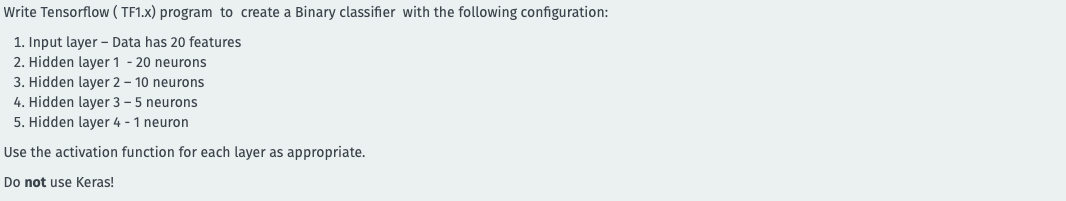

In [1]:
# Objective is to create multiple layers for the training and use relu as the intermediate activation function. 
# Sigmoid activation will be used as the last layer for the binary classification
# Here, it is worth mentioning that gaining accuracy improvement from 60 to 80 % should not be traeted as a 
# great achievement. However, 92 to 94% should be considered as a great achievement.

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
tf.__version__

'1.14.0'

In [4]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [5]:
from tensorflow.examples.tutorials.mnist import input_data

In [6]:
import pandas as pd

In [7]:
import numpy as np

In [8]:
data = pd.read_csv("train.csv")

In [9]:
test = pd.read_csv("test.csv")

In [10]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [11]:
data.drop(columns=['PassengerId'], inplace=True)

In [12]:
test_pasengerids = test['PassengerId']

In [13]:
test.drop(columns=['PassengerId'], inplace=True)

In [14]:
test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [15]:
data['Sex'] = data['Sex'].apply(lambda x: 1 if x=='male' else 0)

In [16]:
test['Sex'] = test['Sex'].apply(lambda x: 1 if x=='male' else 0)

In [17]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [18]:
test['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    int64  
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [20]:
data.drop(columns=['Cabin', 'Name', 'Ticket'], inplace=True)

In [21]:
test.drop(columns=['Cabin', 'Name', 'Ticket'], inplace=True)

In [22]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(4), object(1)
memory usage: 23.0+ KB


In [23]:
data['Embarked'].fillna(method='bfill', inplace=True)

In [24]:
test['Embarked'].fillna(method='bfill', inplace=True)

In [25]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(4), object(1)
memory usage: 23.0+ KB


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


In [27]:
embarked_dict = {'S':0, 'C':1, 'Q':2}
data['Embarked'] = data['Embarked'].apply(lambda x: embarked_dict[x])
test['Embarked'] = test['Embarked'].apply(lambda x: embarked_dict[x])

In [28]:
data['Fare'].fillna(data['Fare'].mode()[0], inplace=True)
test['Fare'].fillna(test['Fare'].mode()[0], inplace=True)

In [29]:
data['Age'].fillna(data['Age'].mode()[0], inplace=True)
test['Age'].fillna(test['Age'].mode()[0], inplace=True)

In [30]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 23.0 KB


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


### Following is the neural network plan

#### Input layer

In [32]:
# Create the model
# Design Parameters:
# Features: 7
# Label-size: 2
# Number of Neurons: 1
# Activation Function: sigmoid

In [33]:
# placeholder to read and feed the images at runtime. This is considered as the input layer
x = tf.placeholder(tf.float32, shape=[None, 7])

# placeholder to read and feed the image labels at runtime.
y = tf.placeholder(tf.float32, shape=[None, 1])

#### Other Hidden and output layers

In [34]:
# Neural network plan
features = ["Layer Number", "Number of neurons", "Weight shape", "Bias shape", "Activation Function", "Outputs"]
values = [
    ["1", "20", "(7, 20)", "(20)", "relu", "20"],
    ["2", "10", "(20, 10)", "(10)", "relu", "10"],
    ["3", "5", "(10, 5)", "(5)", "relu", "5"],
    ["3", "1", "(5, 1)", "(1)", "softmax", "1"]]
network_plan = pd.DataFrame(values, columns=features)
network_plan.set_index(features[0])

,Number of neurons,Weight shape,Bias shape,Activation Function,Outputs
Layer Number,,,,,
1,20,"(7, 20)",(20),relu,20
2,10,"(20, 10)",(10),relu,10
3,5,"(10, 5)",(5),relu,5
3,1,"(5, 1)",(1),softmax,1


In [35]:
def Dense(layer_input, weight_shape, bias_shape, activation):
    # hidden layer
    w = tf.Variable(tf.truncated_normal([weight_shape[0], weight_shape[1]], stddev=0.1))
    b = tf.Variable(tf.zeros([bias_shape]))
    
    # Net input function 
    I = tf.matmul(layer_input, w)+b

    # Output of the first hidden layer
    #output
    if activation=='sigmoid':
        output = tf.nn.sigmoid(I)
    elif activation=='softmax':
        output = tf.nn.softmax(I)
    else:
        output = tf.nn.relu(I)
    return output

In [36]:
def Train(labels, logits):
    # Loss and optimizer
    # Cross entropy
    cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=labels, logits=logits))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)
    train = optimizer.minimize(cross_entropy)
    return train

In [37]:
output1 = Dense(x, weight_shape=(7, 20), bias_shape=20, activation='relu')

In [38]:
output2 = Dense(output1, weight_shape=(20, 10), bias_shape=10, activation='relu')

In [39]:
output3 = Dense(output2, weight_shape=(10, 5), bias_shape=5, activation='relu')

In [40]:
output = Dense(output3, weight_shape=(5, 1), bias_shape=1, activation='sigmoid')

In [41]:
train1 = Train(labels=y, logits=output)

In [42]:
# Create Session
sess = tf.Session()
init = tf.global_variables_initializer()

In [43]:
sess.run(init)

In [44]:
def next_batch(n):
    start = int(np.random.uniform(low=1, high=13, size=(1,))[0])
    end = start*100
    feature = data.drop(columns='Survived')
    labels = data[['Survived']]
    return feature[start:end], labels[start:end]

In [45]:
# training (epoches)
for steps in range(10000):
    features, labels = next_batch(20)
    sess.run(train1, feed_dict={y:labels, x:features})

In [46]:
test_features = test

In [47]:
# following to be opened after the test

In [48]:
#test_features, test_labels = next_batch(100); 

In [49]:
# Pass the test data through the model
# NOTE: there are no loop for test
predict = sess.run(output, feed_dict={x: test_features})

In [50]:
# argmax will give predicted values in terms of numbers
result = sess.run(tf.argmax(predict, axis=1))

In [51]:
# following to be opened after the test

In [52]:
# Similarly, argmax for labels also needs to be considered for the comparison
#labels = sess.run(tf.argmax(test_labels, axis=1))

In [53]:
#accuracy_score(result, labels)

In [54]:
test_pasengerids.shape

(418,)

In [55]:
test_pasengerids.values.reshape(1,-1)

array([[ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,  902,
         903,  904,  905,  906,  907,  908,  909,  910,  911,  912,  913,
         914,  915,  916,  917,  918,  919,  920,  921,  922,  923,  924,
         925,  926,  927,  928,  929,  930,  931,  932,  933,  934,  935,
         936,  937,  938,  939,  940,  941,  942,  943,  944,  945,  946,
         947,  948,  949,  950,  951,  952,  953,  954,  955,  956,  957,
         958,  959,  960,  961,  962,  963,  964,  965,  966,  967,  968,
         969,  970,  971,  972,  973,  974,  975,  976,  977,  978,  979,
         980,  981,  982,  983,  984,  985,  986,  987,  988,  989,  990,
         991,  992,  993,  994,  995,  996,  997,  998,  999, 1000, 1001,
        1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012,
        1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023,
        1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034,
        1035, 1036, 1037, 1038, 1039, 

In [56]:
result_df = pd.DataFrame({'PassengerId':test_pasengerids, 'Survived':result})

In [57]:
result_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,0
415,1307,0
416,1308,0


In [58]:
result_df.to_csv('TitanicSurvival_rf.csv',index=False)

In [59]:
test_pasengerids.values

array([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,  902,
        903,  904,  905,  906,  907,  908,  909,  910,  911,  912,  913,
        914,  915,  916,  917,  918,  919,  920,  921,  922,  923,  924,
        925,  926,  927,  928,  929,  930,  931,  932,  933,  934,  935,
        936,  937,  938,  939,  940,  941,  942,  943,  944,  945,  946,
        947,  948,  949,  950,  951,  952,  953,  954,  955,  956,  957,
        958,  959,  960,  961,  962,  963,  964,  965,  966,  967,  968,
        969,  970,  971,  972,  973,  974,  975,  976,  977,  978,  979,
        980,  981,  982,  983,  984,  985,  986,  987,  988,  989,  990,
        991,  992,  993,  994,  995,  996,  997,  998,  999, 1000, 1001,
       1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012,
       1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023,
       1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034,
       1035, 1036, 1037, 1038, 1039, 1040, 1041, 10

In [60]:
result

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,